In [1]:
from hangman import Hangmann
from agents import LessDummyPlayer
from copy import copy
from tqdm.notebook import tqdm
import json 
import pandas as pd 
import numpy as np 

In [2]:
fj = '../../data/parole_manzoni.json'

with open(fj, 'r') as infile:
    jfile = json.load(infile)
list_of_words = list(set(jfile['words']))
h = Hangmann(player_name='LessDummy', words=list_of_words)
dummy = LessDummyPlayer(game=h)

## Experimental setup

In [3]:
def create_experiments(list_of_words: list, word_len: int, num_iterations: int):
    experiments = []
    candidate_words = [word for word in list_of_words if len(word) == word_len]
    h = Hangmann(player_name='LessDummy', words=list_of_words)
    dummy = LessDummyPlayer(game=h)
    word = np.random.choice(candidate_words)
    word_index = copy(dummy.word_index)
    freq = copy(dummy.freq)
    for i in range(num_iterations):
        hi = Hangmann(player_name='LessDummy_{}'.format(i), word_to_guess=word, words=list_of_words)
        di = LessDummyPlayer(game=hi, word_index=word_index, freq=freq)
        experiments.append(di)   
    return experiments    

## Esperimenti con diverse lunghezze nelle parole

In [4]:
import matplotlib.pyplot as plt

In [5]:
E = []
for i in range(4, 11):
    experiments = create_experiments(list_of_words, word_len=i, num_iterations=200)
    E.extend(experiments)
len(E)

1400

In [6]:
results = []
for e in tqdm(E):
    win, score = e.play()
    results.append({'win': win, 'score': score, 'worlen': len(e.game.word_to_guess), 
                    'word': e.game.word_to_guess})
R = pd.DataFrame(results)

  0%|          | 0/1400 [00:00<?, ?it/s]

In [7]:
count_word_by_len = {}
for word in list_of_words:
    ln = len(word)
    if ln in count_word_by_len:
        count_word_by_len[ln] += 1
    else:
        count_word_by_len[ln] = 1

In [8]:
count_word_by_len
cl = pd.Series(dict([(w, c) for w, c in count_word_by_len.items() if w >= 4 and w <= 10]))
cl 

8     2946
5     1372
4      527
10    2305
6     1861
9     2809
7     2724
dtype: int64

In [9]:
len_vs_win = pd.DataFrame(R.groupby('worlen').sum()['win'])

In [10]:
len_vs_win['num_words'] = cl

In [11]:
len_vs_win = len_vs_win.reset_index()
len_vs_win

,worlen,win,num_words
0,4,81,527
1,5,3,1372
2,6,8,1861
3,7,7,2724
4,8,24,2946
5,9,12,2809
6,10,90,2305


In [12]:
len_vs_win.corr()

,worlen,win,num_words
worlen,1.000000,0.126758,0.809413
win,0.126758,1.000000,-0.379398
num_words,0.809413,-0.379398,1.000000


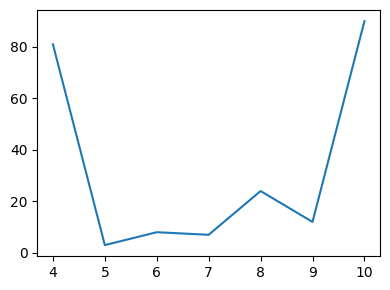

In [13]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(len_vs_win['worlen'], len_vs_win['win'])
plt.tight_layout()
plt.show()

## Esperimenti con diverse scelte dell'azione più efficace

In [15]:
E = []
for i in range(4, 11):
    experiments = create_experiments(list_of_words, word_len=i, num_iterations=100)
    E.extend(experiments)
len(E)

700

In [16]:
probs = [x / 10 for x in np.random.randint(1, 10, size=len(E))]
print(probs[:10])

[0.7, 0.8, 0.3, 0.6, 0.5, 0.6, 0.2, 0.8, 0.2, 0.7]


In [17]:
results = []
run = list(enumerate(E))
for i, e in tqdm(run):
    e.prob_l = probs[i]
    win, score = e.play()
    results.append({'win': win, 'score': score, 'worlen': len(e.game.word_to_guess), 
                    'word': e.game.word_to_guess, 'prob': e.prob_l})
R = pd.DataFrame(results)

  0%|          | 0/700 [00:00<?, ?it/s]

In [18]:
R

,win,score,worlen,word,prob
0,False,0,4,sala,0.7
1,True,12,4,sala,0.8
2,False,-2,4,sala,0.3
3,False,-1,4,sala,0.6
4,False,-2,4,sala,0.5
...,...,...,...,...,...
695,False,0,10,conversare,0.7
696,False,0,10,conversare,0.4
697,False,-2,10,conversare,0.1
698,False,0,10,conversare,0.2


In [20]:
R[['score', 'prob']].corr()

,score,prob
score,1.000000,0.251167
prob,0.251167,1.000000


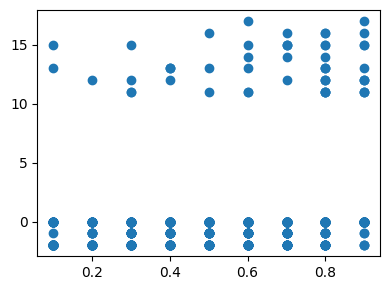

In [22]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(R['prob'], R['score'])
plt.tight_layout()
plt.show()

In [24]:
import seaborn as sns

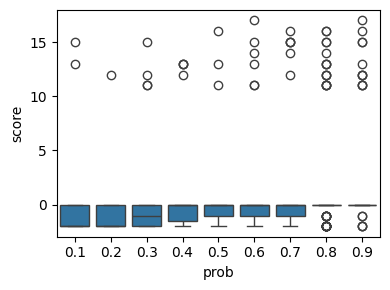

In [25]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.boxplot(data=R, y='score', x='prob', ax=ax)
plt.tight_layout()
plt.show()

In [28]:
matrix = R[['score', 'prob', 'worlen']].to_numpy()

In [32]:
matrix = np.array([
    [2, 3, 4, 5, 6, 8, 2],
    [1, 0, 0, 2, 3, 4, 6],
    [2, 5, 5, 1, 8, 8, 8]
])

In [41]:
matrix[: , 3:5].T

array([[5, 2, 1],
       [6, 3, 8]])